In [1]:
import numpy as np
from numpy.linalg import inv, det


import matplotlib.pyplot as plt
from matplotlib import cm
from matplotlib.ticker import LinearLocator

from anneling_one import Annealing1
from hook import discrete_hook

import random
random.seed(99)

In [2]:
COUNTER = 0

In [3]:
def xyz_gen(gen, function):
    
    x=[x[0] for x in gen]
    y=[x[1] for x in gen]
    z=[function([x[i],y[i]],count=False) for i in range(len(gen))]
    return x,y,z

In [4]:
N1 = 1000
N2 = 1000
grid_dim =200
Ef = 2
EfI=  Ef*np.array([[1,0],[0,1]])
piI = 2*np.pi* np.array([[1,0],[0,1]])

A = np.array([ [1/2, np.sqrt(3)/2],
               [1/2, -np.sqrt(3)/2]]).T
invA= inv(A)
B = 2*np.pi*invA.T

def H_mat(n1,n2):
    
    k = (n1/N1)*B[:,0]+(n2/N2)*B[:,1]
    
    ka1=np.dot(A[:,0],k) # ka1,k2 = np.dot(A,k)
    ka2=np.dot(A[:,1],k)
    
    f = np.exp(1j*ka1)+ np.exp(1j*ka2)+1 
    
    f_conj= np.conj(f)
    
    H = np.array([[0, f],[f_conj,0]])
    
    return H

def det_sq(n1,n2):
    
    det_H= det( H_mat(n1,n2)-EfI )

    return np.real(det_H)*np.real(det_H)

def bands_F(n1,n2):
    
    bands= np.linalg.eigvals( H_mat(n1,n2) )

    return np.real(bands)


(2, 1000, 1000)


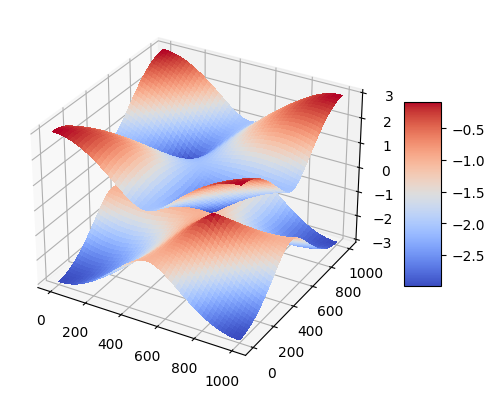

In [5]:
X1 =  np.arange(0, N1, 1)
X2 =  np.arange(0, N2, 1)

              
bands= np.transpose([[ bands_F(x1,x2) for x2 in X2] for x1 in X1], axes=[2,1,0])
print(bands.shape)  

X1, X2 = np.meshgrid(X1, X2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})

for band in bands:

    surf = ax.plot_surface(X1, X2, band, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)
    

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

zsort: [2.76924752e-09 2.76924752e-09 2.76924752e-09 2.76924752e-09
 2.76924752e-09]


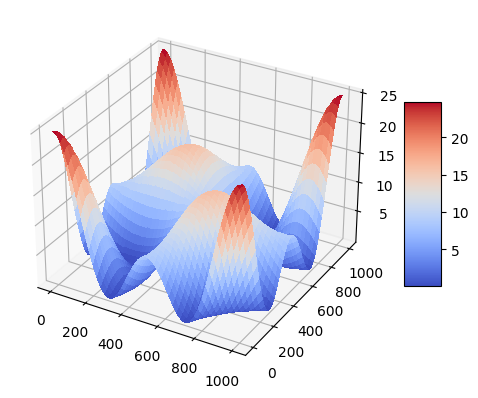

In [6]:
def fit_function(x, count=True):
    if count:
        global COUNTER
        COUNTER+=1
    return det_sq(x[0],x[1])

X1 =  np.arange(0, N1, 1)
X2 =  np.arange(0, N2, 1)

              
Z= np.array([fit_function([x1,x2]) for x2 in X2 for x1 in X1])
print("zsort:",np.sort(Z)[:5]) 

Z= np.array([[fit_function([x1,x2]) for x2 in X2] for x1 in X1])

X1, X2 = np.meshgrid(X1, X2)
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
surf = ax.plot_surface(X1, X2, Z, cmap=cm.coolwarm,
                       linewidth=0, antialiased=False)

fig.colorbar(surf, shrink=0.5, aspect=5)
plt.show()

In [7]:
# Experiment settings

#Hyperparameters of the model
model_par = {
    
    'initialTemp': 1, 
    'finalTemp': 0.0003,

    'beta': 10,
    'bounds': [[-N1,N1],[-N1,N2]],

    'nr_neighbours': 1,
    'step_size': 4,
    'gaussian_sd':5,
    
    'known_min': 8.76763323079435e-05
    
}

#
input_size = 2 # since our function has one variable this is a trivial scenario.
start_point = [20, 30]

# Experiment
experiment = Annealing1(fit_function,start_point, model_par)

In [8]:
epochs= 5
history_book = experiment.evolve( epochs, prints_p=5)

temp:1|epoch:0|change:-0.6460054855261816|value:23.805608834544767
temp:0.09090909090909091|epoch:0|change:-0.34785385954844017|value:23.63823406132774
temp:0.047619047619047616|epoch:0|change:0.8636927445206588|value:22.134165418391678
temp:0.03225806451612903|epoch:0|change:0.12385045861014277|value:20.504330751730524
temp:0.024390243902439025|epoch:0|change:0.3672030133393491|value:20.032928293681703
temp:0.0196078431372549|epoch:0|change:-0.40279536936234095|value:17.803349101703496
temp:0.01639344262295082|epoch:0|change:-0.04470267536148498|value:15.705676951899955
temp:0.014084507042253523|epoch:0|change:1.5022543106331945|value:14.693952901404124
temp:0.01234567901234568|epoch:0|change:-0.04253990585414513|value:14.178693679354817
temp:0.010989010989010988|epoch:0|change:-0.4995356638047408|value:11.689082456385137
temp:0.0099009900990099|epoch:0|change:-0.09730903415562331|value:9.202372320349076
temp:0.009009009009009007|epoch:0|change:-1.3676871485166657|value:7.834685171832

In [9]:
final_solution = experiment.actual_solution
final_value = fit_function(experiment.actual_solution)
print("final_solution:",final_solution)
print("final_value:",final_value)

final_solution: [-156, 177]
final_value: 8.395415704516222e-06


In [10]:
COUNTER = 0
solutions = []
solution_values=[]
for s1 in range(-N1,N1 ,grid_dim):
    for s2 in range(-N2+20,N2-20, grid_dim):
        start_point =[s1,s2]
        experiment = Annealing1(fit_function,start_point, model_par)
        experiment.evolve( epochs, prints_p=999, tr_print=False)
        solutions.append(experiment.actual_solution)
        solution_values.append(experiment.actual_value)
        print("start points:{} |solution:{} |value:{}".format(start_point,experiment.actual_solution,experiment.actual_value))

start points:[-1000, -980] |solution:[-705, -990] |value:3.1853753430937374e-06
start points:[-1000, -780] |solution:[-983, -702] |value:5.504870629576401e-05
start points:[-1000, -580] |solution:[-997, -708] |value:5.237083147894264e-05
start points:[-1000, -380] |solution:[-992, -286] |value:9.171935078022262e-06
start points:[-1000, -180] |solution:[-993, -287] |value:7.425019063527334e-05
start points:[-1000, 20] |solution:[-1000, 290] |value:2.746233025299034e-05
start points:[-1000, 220] |solution:[-967, 305] |value:1.6854200704399997e-05
start points:[-1000, 420] |solution:[-941, 315] |value:3.0624289304351746e-05
start points:[-1000, 620] |solution:[-965, 729] |value:3.3760824404295643e-07
start points:[-1000, 820] |solution:[-948, 740] |value:8.203613042210148e-05
start points:[-800, -980] |solution:[-696, -970] |value:2.29754605174473e-06
start points:[-800, -780] |solution:[-713, -706] |value:7.425019063530498e-05
start points:[-800, -580] |solution:[-779, -673] |value:2.196

In [11]:
print("Cout :", COUNTER)
print("Advantage:", COUNTER/(4*N1*N2))

Cout : 30850
Advantage: 0.0077125


/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_89056/4267174279.py:2: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


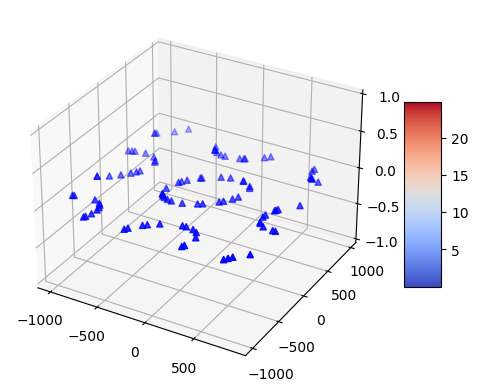

In [12]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x,y,z = xyz_gen(solutions, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

In [13]:
# Clen the results
tollerance = model_par['known_min']
clean_solutions=[]
for i in range(len(solutions)):
    if solution_values[i] <= tollerance:
        clean_solutions.append(solutions[i])

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_89056/3868486351.py:2: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


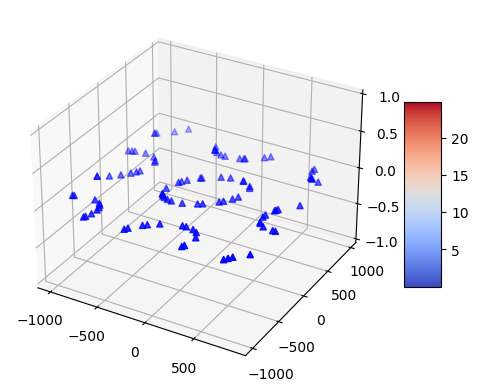

In [14]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x,y,z = xyz_gen(clean_solutions, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

In [15]:
print("Cout :", COUNTER)

Cout : 30850


In [16]:
# now we need to be sure that we extract a complet contour

explored = []

total_solutions = []
total_values = []
for solution in clean_solutions:
    if solution not in explored:
        explored.append(solution)
        
        extend_solutions, extended_values = discrete_hook(fit_function,solution,boundary=[[-100,100],[-100,100]],tolerance =0.05)
        print("extended_solutions:",extend_solutions)
        for i in range(len(extend_solutions)):
            s= extend_solutions[i]
            v= extended_values[i]
            total_solutions.append(s)
            total_values.append(v)
            explored.append(solution)
        
        

extended_solutions: [[-705, -990]]
extended_solutions: [[-983, -702]]
extended_solutions: [[-997, -708]]
extended_solutions: [[-992, -286]]
extended_solutions: [[-993, -287]]
extended_solutions: [[-1000, 290]]
extended_solutions: [[-967, 305]]
extended_solutions: [[-941, 315]]
extended_solutions: [[-965, 729]]
extended_solutions: [[-948, 740]]
extended_solutions: [[-696, -970]]
extended_solutions: [[-713, -706]]
extended_solutions: [[-779, -673]]
extended_solutions: [[-898, -224]]
extended_solutions: [[-818, -151]]
extended_solutions: [[-706, 8], [-705, 8], [-706, 9], [-707, 8], [-706, 7], [-707, 7], [-705, 9], [-705, 7], [-707, 9], [-708, 6], [-704, 10], [-704, 8], [-706, 8], [-704, 9], [-704, 7], [-707, 6], [-703, 10], [-703, 8], [-706, 10], [-705, 10], [-707, 10], [-708, 7], [-704, 11], [-708, 8], [-708, 9], [-709, 6], [-706, 6], [-705, 6], [-708, 5], [-709, 5], [-703, 11], [-703, 9], [-704, 6], [-707, 5], [-703, 7], [-708, 10], [-709, 7], [-705, 11], [-710, 4], [-702, 12], [-702, 1

extended_solutions: [[-290, 0], [-289, 0], [-290, 1], [-291, 0], [-290, -1], [-291, -1], [-289, 1], [-289, -1], [-291, 1], [-292, -2], [-288, 2], [-288, 0], [-290, 0], [-288, 1], [-288, -1], [-291, -2], [-287, 2], [-287, 0], [-290, 2], [-289, 2], [-291, 2], [-292, -1], [-288, 3], [-292, 0], [-292, 1], [-293, -2], [-290, -2], [-289, -2], [-292, -3], [-293, -3], [-287, 3], [-287, 1], [-288, -2], [-291, -3], [-287, -1], [-292, 2], [-293, -1], [-289, 3], [-294, -4], [-286, 4], [-286, 2], [-286, 0], [-286, 3], [-286, 1], [-287, -2], [-290, -3], [-286, -1], [-293, -4], [-285, 4], [-285, 2], [-285, 0], [-290, 3], [-291, 3], [-288, 4], [-287, 4], [-292, 3], [-293, 0], [-289, 4], [-294, -3], [-286, 5], [-293, 1], [-294, -2], [-293, 2], [-294, -1], [-295, -4], [-289, -3], [-292, -4], [-288, -3], [-291, -4], [-294, -5], [-295, -5], [-285, 5], [-285, 3], [-285, 1], [-287, -3], [-290, -4], [-286, -2], [-293, -5], [-285, -1], [-293, 3], [-294, 0], [-290, 4], [-295, -3], [-287, 5], [-296, -6], [-284,

extended_solutions: [[-274, 30], [-273, 30], [-274, 31], [-275, 30], [-274, 29], [-275, 29], [-273, 31], [-273, 29], [-275, 31], [-276, 28], [-272, 32], [-272, 30], [-274, 30], [-272, 31], [-272, 29], [-275, 28], [-271, 32], [-271, 30], [-274, 32], [-273, 32], [-275, 32], [-276, 29], [-272, 33], [-276, 30], [-276, 31], [-277, 28], [-274, 28], [-273, 28], [-276, 27], [-277, 27], [-271, 33], [-271, 31], [-272, 28], [-275, 27], [-271, 29], [-276, 32], [-277, 29], [-273, 33], [-278, 26], [-270, 34], [-270, 32], [-270, 30], [-270, 33], [-270, 31], [-271, 28], [-274, 27], [-270, 29], [-277, 26], [-269, 34], [-269, 32], [-269, 30], [-274, 33], [-275, 33], [-272, 34], [-271, 34], [-276, 33], [-277, 30], [-273, 34], [-278, 27], [-270, 35], [-277, 31], [-278, 28], [-277, 32], [-278, 29], [-279, 26], [-273, 27], [-276, 26], [-272, 27], [-275, 26], [-278, 25], [-279, 25], [-269, 35], [-269, 33], [-269, 31], [-271, 27], [-274, 26], [-270, 28], [-277, 25], [-269, 29], [-277, 33], [-278, 30], [-274, 

extended_solutions: [[-243, 77], [-242, 77], [-243, 78], [-244, 77], [-243, 76], [-244, 76], [-242, 78], [-242, 76], [-244, 78], [-245, 75], [-241, 79], [-241, 77], [-243, 77], [-241, 78], [-241, 76], [-244, 75], [-240, 79], [-240, 77], [-243, 79], [-242, 79], [-244, 79], [-245, 76], [-241, 80], [-245, 77], [-245, 78], [-246, 75], [-243, 75], [-242, 75], [-245, 74], [-246, 74], [-240, 80], [-240, 78], [-241, 75], [-244, 74], [-240, 76], [-245, 79], [-246, 76], [-242, 80], [-247, 73], [-239, 81], [-239, 79], [-239, 77], [-239, 80], [-239, 78], [-240, 75], [-243, 74], [-239, 76], [-246, 73], [-238, 81], [-238, 79], [-238, 77], [-243, 80], [-244, 80], [-241, 81], [-240, 81], [-245, 80], [-246, 77], [-242, 81], [-247, 74], [-239, 82], [-246, 78], [-247, 75], [-246, 79], [-247, 76], [-248, 73], [-242, 74], [-245, 73], [-241, 74], [-244, 73], [-247, 72], [-248, 72], [-238, 82], [-238, 80], [-238, 78], [-240, 74], [-243, 73], [-239, 75], [-246, 72], [-238, 76], [-246, 80], [-247, 77], [-243, 

extended_solutions: [[-60, -745], [-59, -745], [-60, -744], [-61, -745], [-60, -746], [-61, -746], [-59, -744], [-59, -746], [-61, -744], [-62, -747], [-58, -743], [-58, -745], [-60, -745], [-58, -744], [-58, -746], [-61, -747], [-57, -743], [-57, -745], [-60, -743], [-59, -743], [-61, -743], [-62, -746], [-58, -742], [-62, -745], [-62, -744], [-63, -747], [-60, -747], [-59, -747], [-62, -748], [-63, -748], [-57, -742], [-57, -744], [-58, -747], [-61, -748], [-57, -746], [-62, -743], [-63, -746], [-59, -742], [-64, -749], [-56, -741], [-56, -743], [-56, -745], [-56, -742], [-56, -744], [-57, -747], [-60, -748], [-56, -746], [-63, -749], [-55, -741], [-55, -743], [-55, -745], [-60, -742], [-61, -742], [-58, -741], [-57, -741], [-62, -742], [-63, -745], [-59, -741], [-64, -748], [-56, -740], [-63, -744], [-64, -747], [-63, -743], [-64, -746], [-65, -749], [-59, -748], [-62, -749], [-58, -748], [-61, -749], [-64, -750], [-65, -750], [-55, -740], [-55, -742], [-55, -744], [-57, -748], [-60

extended_solutions: [[-72, -319], [-71, -319], [-72, -318], [-73, -319], [-72, -320], [-73, -320], [-71, -318], [-71, -320], [-73, -318], [-74, -321], [-70, -317], [-70, -319], [-72, -319], [-70, -318], [-70, -320], [-73, -321], [-69, -317], [-69, -319], [-72, -317], [-71, -317], [-73, -317], [-74, -320], [-70, -316], [-74, -319], [-74, -318], [-75, -321], [-72, -321], [-71, -321], [-74, -322], [-75, -322], [-69, -316], [-69, -318], [-70, -321], [-73, -322], [-69, -320], [-74, -317], [-75, -320], [-71, -316], [-76, -323], [-68, -315], [-68, -317], [-68, -319], [-68, -316], [-68, -318], [-69, -321], [-72, -322], [-68, -320], [-75, -323], [-67, -315], [-67, -317], [-67, -319], [-72, -316], [-73, -316], [-70, -315], [-69, -315], [-74, -316], [-75, -319], [-71, -315], [-76, -322], [-68, -314], [-75, -318], [-76, -321], [-75, -317], [-76, -320], [-77, -323], [-71, -322], [-74, -323], [-70, -322], [-73, -323], [-76, -324], [-77, -324], [-67, -314], [-67, -316], [-67, -318], [-69, -322], [-72

extended_solutions: [[80, 321], [81, 321], [80, 322], [79, 321], [80, 320], [79, 320], [81, 322], [81, 320], [79, 322], [78, 319], [82, 323], [82, 321], [80, 321], [82, 322], [82, 320], [79, 319], [83, 323], [83, 321], [80, 323], [81, 323], [79, 323], [78, 320], [82, 324], [78, 321], [78, 322], [77, 319], [80, 319], [81, 319], [78, 318], [77, 318], [83, 324], [83, 322], [82, 319], [79, 318], [83, 320], [78, 323], [77, 320], [81, 324], [76, 317], [84, 325], [84, 323], [84, 321], [84, 324], [84, 322], [83, 319], [80, 318], [84, 320], [77, 317], [85, 325], [85, 323], [85, 321], [80, 324], [79, 324], [82, 325], [83, 325], [78, 324], [77, 321], [81, 325], [76, 318], [84, 326], [77, 322], [76, 319], [77, 323], [76, 320], [75, 317], [81, 318], [78, 317], [82, 318], [79, 317], [76, 316], [75, 316], [85, 326], [85, 324], [85, 322], [83, 318], [80, 317], [84, 319], [77, 316], [85, 320], [77, 324], [76, 321], [80, 325], [75, 318], [83, 326], [74, 315], [86, 327], [86, 325], [86, 323], [86, 321], 

extended_solutions: [[54, -259], [55, -259], [54, -258], [53, -259], [54, -260], [53, -260], [55, -258], [55, -260], [53, -258], [52, -261], [56, -257], [56, -259], [54, -259], [56, -258], [56, -260], [53, -261], [57, -257], [57, -259], [54, -257], [55, -257], [53, -257], [52, -260], [56, -256], [52, -259], [52, -258], [51, -261], [54, -261], [55, -261], [52, -262], [51, -262], [57, -256], [57, -258], [56, -261], [53, -262], [57, -260], [52, -257], [51, -260], [55, -256], [50, -263], [58, -255], [58, -257], [58, -259], [58, -256], [58, -258], [57, -261], [54, -262], [58, -260], [51, -263], [59, -255], [59, -257], [59, -259], [54, -256], [53, -256], [56, -255], [57, -255], [52, -256], [51, -259], [55, -255], [50, -262], [58, -254], [51, -258], [50, -261], [51, -257], [50, -260], [49, -263], [55, -262], [52, -263], [56, -262], [53, -263], [50, -264], [49, -264], [59, -254], [59, -256], [59, -258], [57, -262], [54, -263], [58, -261], [51, -264], [59, -260], [51, -256], [50, -259], [54, -2

extended_solutions: [[712, 5], [713, 5], [712, 6], [711, 5], [712, 4], [711, 4], [713, 6], [713, 4], [711, 6], [710, 3], [714, 7], [714, 5], [712, 5], [714, 6], [714, 4], [711, 3], [715, 7], [715, 5], [712, 7], [713, 7], [711, 7], [710, 4], [714, 8], [710, 5], [710, 6], [709, 3], [712, 3], [713, 3], [710, 2], [709, 2], [715, 8], [715, 6], [714, 3], [711, 2], [715, 4], [710, 7], [709, 4], [713, 8], [708, 1], [716, 9], [716, 7], [716, 5], [716, 8], [716, 6], [715, 3], [712, 2], [716, 4], [709, 1], [717, 9], [717, 7], [717, 5], [712, 8], [711, 8], [714, 9], [715, 9], [710, 8], [709, 5], [713, 9], [708, 2], [716, 10], [709, 6], [708, 3], [709, 7], [708, 4], [707, 1], [713, 2], [710, 1], [714, 2], [711, 1], [708, 0], [707, 0], [717, 10], [717, 8], [717, 6], [715, 2], [712, 1], [716, 3], [709, 0], [717, 4], [709, 8], [708, 5], [712, 9], [707, 2], [715, 10], [706, -1], [718, 11], [718, 9], [718, 7], [718, 5], [718, 10], [718, 8], [718, 6], [716, 2], [713, 1], [717, 3], [710, 0], [718, 4], [70

In [17]:
print("Final Cout :", COUNTER)
print("Final Advantage:", COUNTER/(4*N1*N2))

Final Cout : 122912
Final Advantage: 0.030728


/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_89056/1149142918.py:2: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


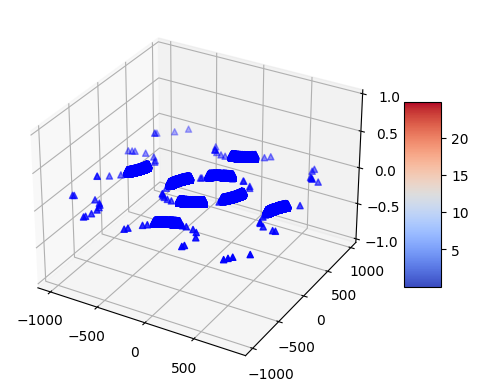

In [18]:
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x,y,z = xyz_gen(total_solutions, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

/var/folders/3_/hxxz6cjj6k92q_tqrvht1tf80000gn/T/ipykernel_89056/194469711.py:15: MatplotlibDeprecationWarning: Starting from Matplotlib 3.6, colorbar() will steal space from the mappable's axes, rather than from the current axes, to place the colorbar.  To silence this warning, explicitly pass the 'ax' argument to colorbar().
  fig.colorbar(surf, shrink=0.5, aspect=5)


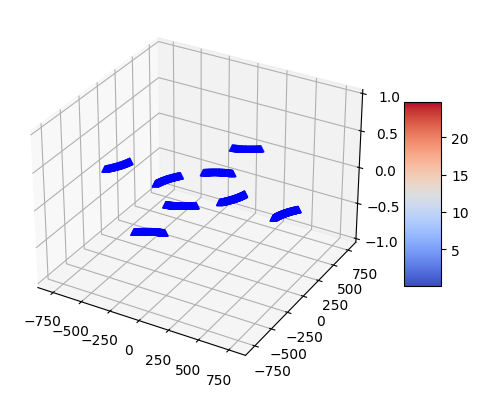

In [19]:
#final selection
f_select =[]
v_select =[]
minim = 8.76763323079435e-05

for i in range(len(total_solutions)):
    s = total_solutions[i]
    v = total_values[i]
    if v<=minim:
        if s not in f_select:
            f_select.append(s)
            v_select.append(v)
    
fig, ax = plt.subplots(subplot_kw={"projection": "3d"})
fig.colorbar(surf, shrink=0.5, aspect=5)
ax.set_zlim(-1.01, 1.01)

x,y,z = xyz_gen(f_select, fit_function)
ax.scatter(x,y,z , c='b', marker='^')

